<a href="https://colab.research.google.com/github/gktjdwns/autonomous_curriculum/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

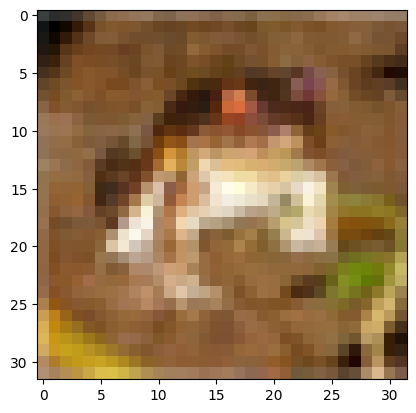

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

plt.imshow(train_images[0])
plt.show()

print(train_images[0])

train_images, test_images = train_images / 255.0, test_images / 255.0


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5389 - accuracy: 0.4368
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1719 - accuracy: 0.5829
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.0174 - accuracy: 0.6416
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9168 - accuracy: 0.6784
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8416 - accuracy: 0.7048


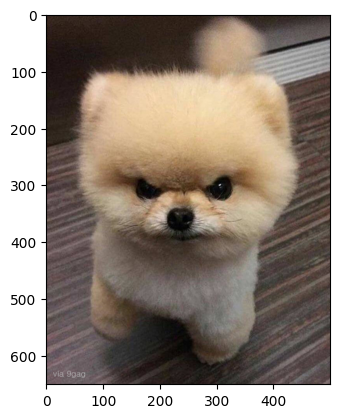

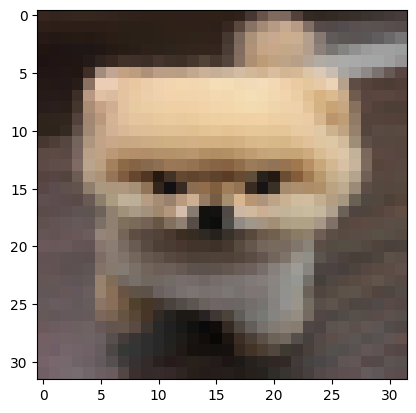

1/1 [==============================] - 0s 23ms/step
5


In [18]:
img = Image.open('/content/drive/MyDrive/apple/dog.jpg')
plt.imshow(img)
plt.show()

img = img.resize((32, 32))

plt.imshow(img)
plt.show()

input_img = np.asarray(img).reshape(1, 32, 32, 3) / 255.0

prediction = model.predict(input_img)
predicted_class = np.argmax(prediction)

print(predicted_class)